In [57]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import sklearn
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

In [58]:
boston = pd.read_csv("boston.csv")
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
5,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.21,28.700001
6,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.43,22.900000
7,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15,27.100000
8,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.93,16.500000
9,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.10,18.900000


In [59]:
boston["MV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MV, dtype: float64

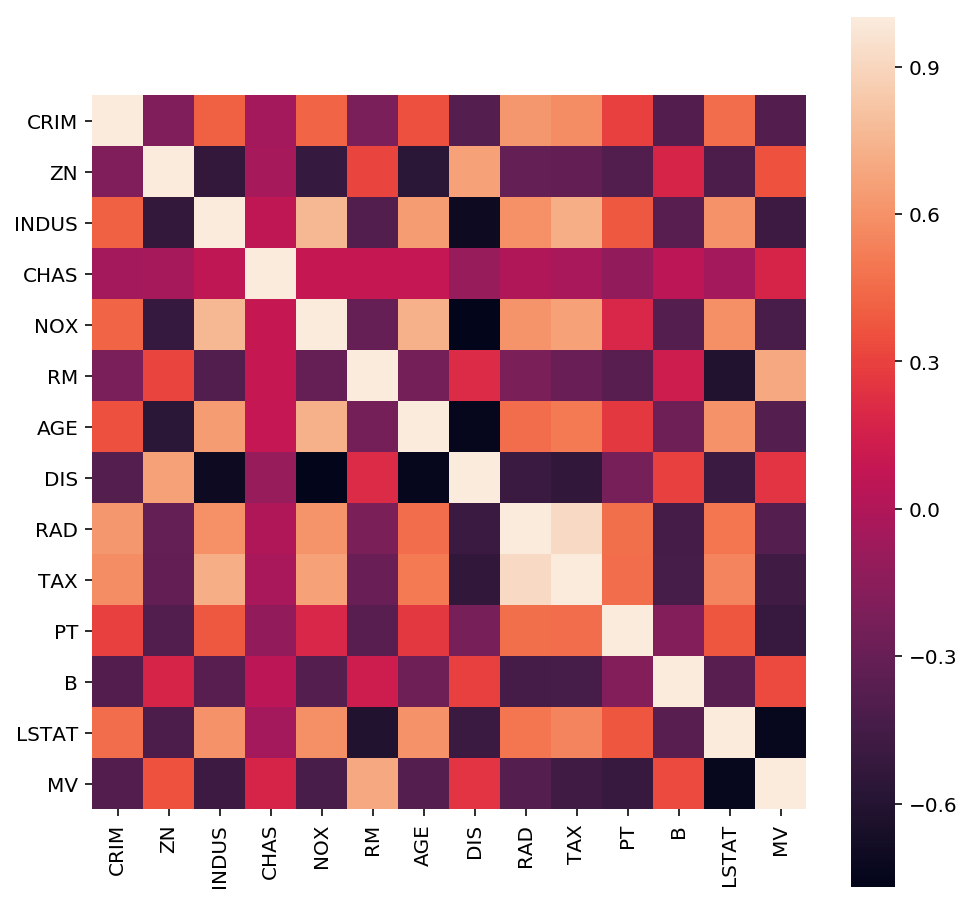

In [60]:
# This gives a "big picture" view of the relationships between the variables in the boston dataset
corrmat = boston.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1, square=True);

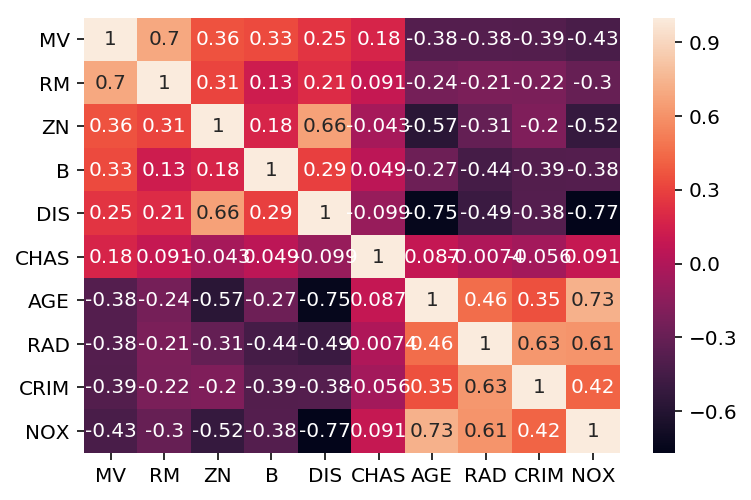

In [61]:
# We can see the coefficients of each variable which shows us their relationships to other variables
v = 10
cols = corrmat.nlargest(v, 'MV')['MV'].index
cm = np.corrcoef(boston[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [62]:
X = boston.drop('MV', axis = 1)
Y = boston['MV']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [76]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [77]:
def plot_performance(X, Y, regressor, DecisionTreeRegressor):
    X = np.array(X).reshape(1,-1)
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, Y, color = 'red')
    y_predict = regressor.predict(X_grid)
    plt.plot(X_grid, y_predict, color = 'blue')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.title( model_name.upper())
    plt.show()

In [78]:
regressor.predict(6.5)[0]

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 1 